In [1]:
import warnings
# Ignore all warnings (not recommended in general)
warnings.filterwarnings('ignore')

# Clustering

In [2]:
import pandas as pd

# Load the CSV file
data = pd.read_csv('catfood_prepared.csv')

# Show general information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            121 non-null    float64
 1   weight           121 non-null    float64
 2   star_rating      121 non-null    float64
 3   total_comments   121 non-null    float64
 4   chicken          121 non-null    int64  
 5   from_ocean       121 non-null    int64  
 6   fish             121 non-null    int64  
 7   tuna             121 non-null    int64  
 8   salmon           121 non-null    int64  
 9   mackerel         121 non-null    int64  
 10  shrimps          121 non-null    int64  
 11  liver            121 non-null    int64  
 12  turkey           121 non-null    int64  
 13  ham              121 non-null    int64  
 14  vegan            121 non-null    int64  
 15  company_farmina  121 non-null    int64  
 16  company_me-o     121 non-null    int64  
 17  company_meat    

In [3]:
data.head()

,price,weight,star_rating,total_comments,chicken,from_ocean,fish,tuna,salmon,mackerel,...,ham,vegan,company_farmina,company_me-o,company_meat,company_purepet,company_purina,company_royal,company_sheba,company_whiskas
0,0.022888,0.113797,0.60,0.638163,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.128879,0.697885,0.65,0.904091,0,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0.285714,0.697885,0.75,0.620522,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0.059754,0.234642,0.50,0.348278,0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0.050538,0.103726,0.75,1.000000,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


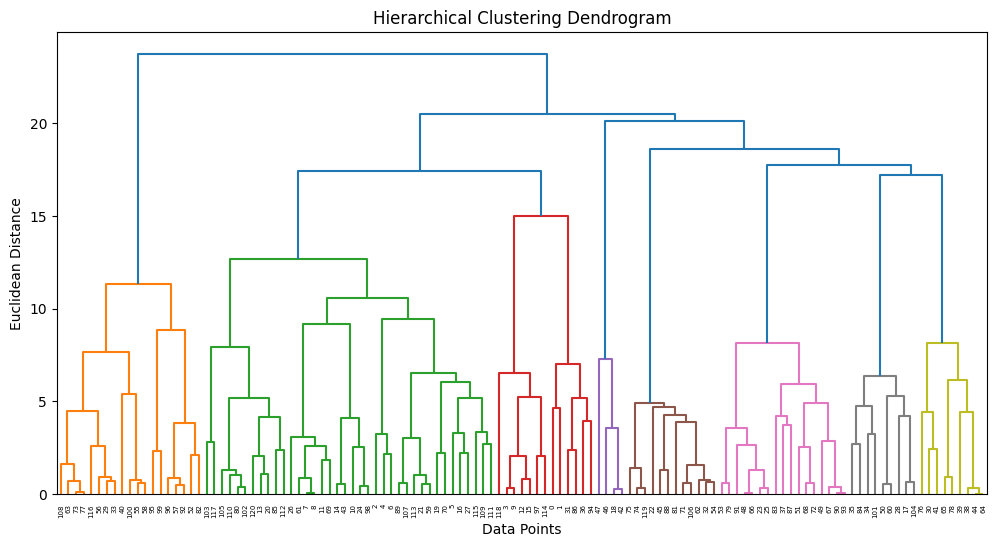

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import StandardScaler

# Assume 'data' is your cat food dataset
# 1. Selecting relevant features (adjust as needed)
features = data.select_dtypes(include=['float64', 'int64'])

# 2. Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# 3. Perform hierarchical clustering using the 'ward' method
linked = linkage(scaled_features, method='ward')

# 4. Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linked,
           orientation='top',
           distance_sort='ascending',
           show_leaf_counts=True)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()


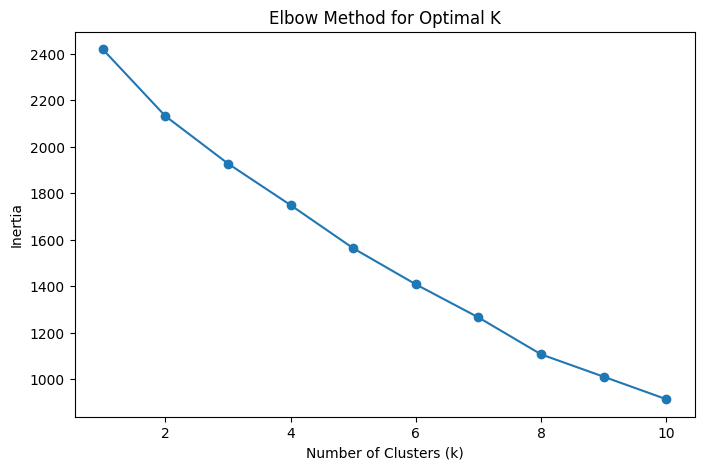

In [6]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.show()

In [14]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 3. Apply K-Means clustering
# Set the number of clusters (e.g., 3)
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)

# 4. Count the number of products in each cluster
cluster_counts = data['Cluster'].value_counts().sort_index()

print("Number of products in each cluster:")
print(cluster_counts)


Number of products in each cluster:
0    85
1    32
2     4
Name: Cluster, dtype: int64


In [15]:
import pandas as pd
import numpy as np

# Extract the centroids
centroids = kmeans.cluster_centers_

# If data was standardized, reverse the standardization
centroids_original = scaler.inverse_transform(centroids)

# Create a DataFrame for easier interpretation
centroid_df = pd.DataFrame(centroids_original, columns=features.columns)
print("Centroids of the Clusters:")
print(centroid_df.round(2))


Centroids of the Clusters:
   price  weight  star_rating  total_comments  chicken  from_ocean  fish  \
0   0.13    0.22         0.69            0.09     0.27        0.82  0.44   
1   0.41    0.33         0.74            0.04     0.28        0.06  0.00   
2   0.06    0.11         0.21            0.05     1.00        0.50  0.00   

   tuna  salmon  mackerel  ...  ham  vegan  company_farmina  company_me-o  \
0  0.33    0.14      0.19  ...  0.0   0.05             0.01          0.16   
1  0.03    0.06     -0.00  ...  0.0   0.41             0.56          0.09   
2  0.50    0.00      0.00  ...  0.0   0.00             0.00          0.00   

   company_meat  company_purepet  company_purina  company_royal  \
0          0.08             0.07            0.11           0.01   
1          0.00            -0.00            0.00           0.34   
2          0.25             0.75            0.00           0.00   

   company_sheba  company_whiskas  
0           0.11             0.45  
1          -0.00  

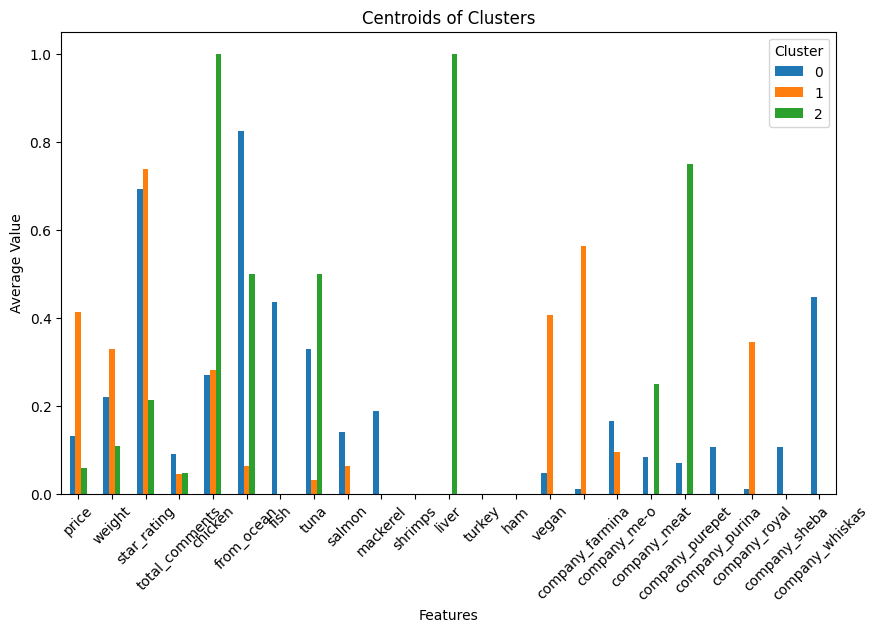

In [16]:
import matplotlib.pyplot as plt

# Plot centroids as a bar chart
centroid_df.T.plot(kind='bar', figsize=(10, 6))
plt.title("Centroids of Clusters")
plt.xlabel("Features")
plt.ylabel("Average Value")
plt.legend(title="Cluster")
plt.xticks(rotation=45)
plt.show()


In [48]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np

# 3. Apply DBSCAN
# Adjust `eps` (maximum distance for a point to be in a cluster) and `min_samples` (minimum points to form a cluster)
dbscan = DBSCAN(eps=5, min_samples=4)
data['Cluster'] = dbscan.fit_predict(scaled_features)

# 4. Count clusters and outliers
# -1 indicates noise or outliers in DBSCAN
cluster_counts = data['Cluster'].value_counts()
num_clusters = len(cluster_counts[cluster_counts.index != -1])  # Exclude noise (-1)
num_outliers = cluster_counts.get(-1, 0)  # Count of noise points

print(f"Number of clusters (excluding outliers): {num_clusters}")
print(f"Number of outliers: {num_outliers}")


Number of clusters (excluding outliers): 1
Number of outliers: 6


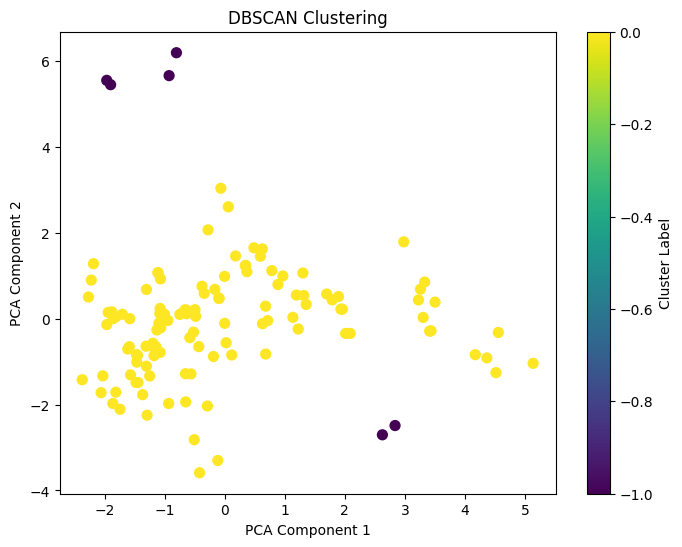

In [49]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce to 2D for visualization using PCA
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)

plt.figure(figsize=(8, 6))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=data['Cluster'], cmap='viridis', s=50)
plt.title("DBSCAN Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster Label")
plt.show()


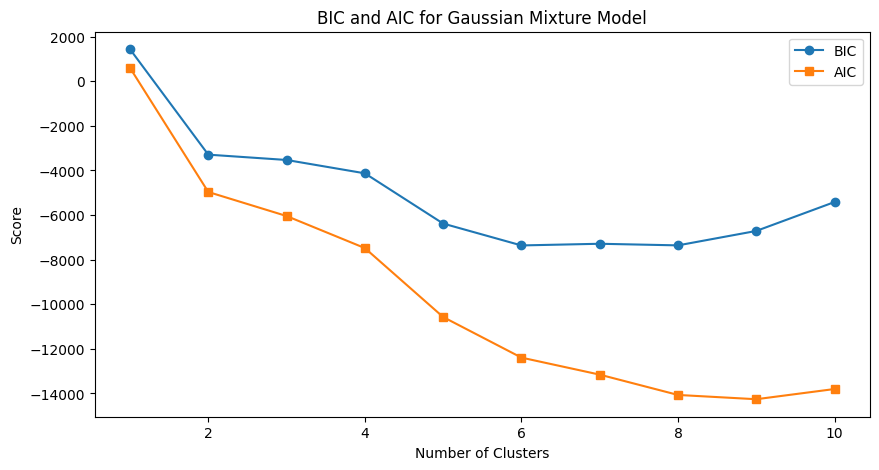

In [50]:
from sklearn.mixture import GaussianMixture
bic = []
aic = []
for k in range(1, 11):
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(scaled_features)
    bic.append(gmm.bic(scaled_features))
    aic.append(gmm.aic(scaled_features))

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), bic, marker='o', label='BIC')
plt.plot(range(1, 11), aic, marker='s', label='AIC')
plt.title("BIC and AIC for Gaussian Mixture Model")
plt.xlabel("Number of Clusters")
plt.ylabel("Score")
plt.legend()
plt.show()


In [54]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

# 3. Apply Gaussian Mixture Model
# Set the number of clusters (adjust as needed)
num_clusters = 8
gmm = GaussianMixture(n_components=num_clusters, random_state=42)
data['Cluster'] = gmm.fit_predict(scaled_features)

# 4. Count the number of products in each cluster
cluster_counts = data['Cluster'].value_counts().sort_index()

print("Number of products in each cluster:")
print(cluster_counts)


Number of products in each cluster:
0    21
1    17
2     4
3    24
4    12
5    18
6    18
7     7
Name: Cluster, dtype: int64


In [55]:
# Calculate cluster means in the original scale
cluster_means = data.groupby('Cluster').mean()
print("Cluster Means:")
print(cluster_means.round(2))


Cluster Means:
         price  weight  star_rating  total_comments  chicken  from_ocean  \
Cluster                                                                    
0         0.18    0.24         0.73            0.05     0.48        0.67   
1         0.14    0.31         0.67            0.01     0.12        0.59   
2         0.06    0.11         0.21            0.05     1.00        0.50   
3         0.10    0.10         0.66            0.02     0.50        0.83   
4         0.29    0.18         0.74            0.09     0.17        0.08   
5         0.50    0.35         0.74            0.02     0.33        0.11   
6         0.13    0.28         0.76            0.27     0.00        1.00   
7         0.14    0.44         0.58            0.14     0.00        1.00   

         fish  tuna  salmon  mackerel  ...  ham  vegan  company_farmina  \
Cluster                                ...                                
0        0.48  0.33    0.00      0.48  ...  0.0   0.10             0.00   